In [1]:
import os, sys, glob, json, shutil
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 1

In [6]:
%aimport src.dataloader
%aimport src.datautils
%aimport src.params

# Fetch Annotated data from Blob

In [7]:
# TODO: automate this part as well
annotations_dir = "../data/AnnotationRound2/OS_7_05_2019_Curated_chunked_annotations"
positives_dir = "../data/AnnotationRound2/OS_7_05_2019_Curated_chunked"
negatives_dir = "../data/AnnotationRound2/OS_7_05_2019_Curated_chunked_negatives"
target_data_dir = "../data/DataArchives/Round2_OS_07_05"

# Parse and make dataset

In [ ]:
# annotations, positive wavs, negative wavs, target directory 
# parse JSON annotations to TSV, add annotations for negative chunks 
# (optional) merge with a previous dataset 
# (optional) split a held-out dev set 

In [79]:
np.random.seed(10)
df, wavfile_map = src.datautils.make_dataset(annotations_dir, positives_dir, negatives_dir, target_data_dir, 
                                             data_source="Orcasound_PodCast_Round2", location="orcasound_lab")

Splitting 57 wavfiles into 8 dev files
Copying over files ..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 98.62it/s]
0it [00:00, ?it/s]


In [12]:
df.head()

,wav_filename,start_time_s,duration_s,location,date,data_source,data_source_id
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136


wav_filename           1562344334_0005.wav
start_time_s                       21.3991
duration_s                         2.60547
location                     orcasound_lab
date                            2019-07-05
data_source       Orcasound_PodCast_Round2
data_source_id                  1562344334
Name: 344, dtype: object


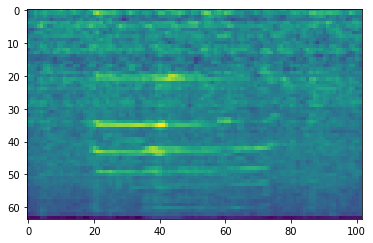

In [80]:
# inspect a few random annotations 
row = df.iloc[np.random.randint(len(df))]; print(row)
af = src.dataloader.AudioFile(Path(positives_dir)/row["wav_filename"], src.params.SAMPLE_RATE)
start_idx = int(row["start_time_s"]*src.params.SAMPLE_RATE) 
end_idx = int(start_idx + row["duration_s"]*src.params.SAMPLE_RATE)
_ = plt.imshow(af.get_window(start_idx, end_idx).T)

# Load with Dataloader and add mean, invstd

In [86]:
wav_dataset = src.dataloader.AudioFileDataset(Path(target_data_dir)/"wav",Path(target_data_dir)/"train.tsv")

Loading file: 1562337136_0004.wav
Loading file: 1562337136_0006.wav
Loading file: 1562337136_000a.wav
Loading file: 1562337136_000b.wav
Loading file: 1562337136_000c.wav
Loading file: 1562337136_000e.wav
Loading file: 1562337136_0010.wav
Loading file: 1562337136_0012.wav
Loading file: 1562337136_0013.wav
Loading file: 1562337136_0017.wav
Loading file: 1562337136_0018.wav
Loading file: 1562337136_0019.wav
Loading file: 1562340736_0001.wav
Loading file: 1562340736_0004.wav
Loading file: 1562340736_0005.wav
Loading file: 1562340736_0006.wav
Loading file: 1562340736_0007.wav
Loading file: 1562340736_0008.wav
Loading file: 1562340736_0009.wav
Loading file: 1562340736_000a.wav
Loading file: 1562340736_000c.wav
Loading file: 1562340736_000d.wav
Loading file: 1562340736_000e.wav
Loading file: 1562340736_000f.wav
Loading file: 1562340736_0010.wav
Loading file: 1562340736_0011.wav
Loading file: 1562340736_0012.wav
Loading file: 1562340736_0013.wav
Loading file: 1562340736_0014.wav
Loading file: 

Dataset size: 1539 windows, 1.047375 hrs


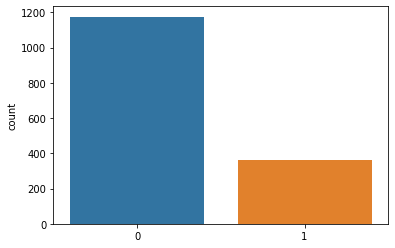

In [87]:
num_windows = len(wav_dataset); num_hrs = num_windows*src.params.WINDOW_S/3600
print("Dataset size: {} windows, {} hrs".format(num_windows, num_hrs))
labels = [l[2] for l in wav_dataset.windows]
_ = sns.countplot(labels)

In [83]:
src.datautils.compute_dataset_stats(target_data_dir, wav_dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:06<00:00, 230.20it/s]


# Remaining Steps

At this stage, you should have (`train/dev.tsv`) files, and a `wav` subdirectory containing source files pointed to in the TSV file. In addition, `mean/invstd*.txt` will also be generated that are used by the Pod.Cast baseline model. 

Finally, before compressing into an archive, a suitable REAMDE.md file should be added describing some statistics, and details about the dataset generation process. See [existing datasets](https://github.com/orcasound/orcadata/wiki/Pod.Cast-data-archive) for examples/details. 